In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import mean,inf,arange
from numpy import std,var
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,GridSearchCV,train_test_split
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report

In [12]:
scaler = StandardScaler()

In [13]:
df = pd.read_csv('../../../data/dataset.csv')

In [14]:
def get_new_target(col):
    return 1 if col == 'V' else 0

In [15]:
df['new_target'] = df['liverpool_result_ft'].apply(get_new_target)

In [16]:
x = df.drop(columns=['liverpool_result_ft','new_target'])

In [17]:
y = df['liverpool_result_ft']

In [18]:
y_new=df['new_target']

In [19]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [20]:
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# CHoix du % du split

In [21]:
part = []
mean_acc = []
for i in np.linspace(0.25,0.7,num=20):
    i=round(i,3)
    part.append(i)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = i)
    model = ExtraTreesClassifier()
    acc = evaluate_model(x_train,y_train,model)
    mean_acc.append(np.mean(acc))

Text(0.5, 1.0, 'k')

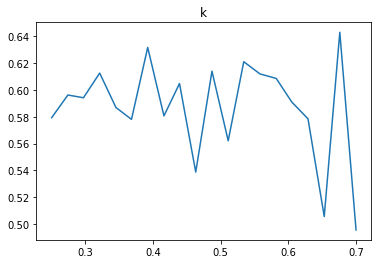

In [22]:
sns.lineplot(x=part,y=mean_acc).set_title('k')

# Tunning Nombre d'arbre

In [8]:
part = []
mean_acc = []
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.4)
for i in np.linspace(100,2000,num=5):
    part.append(i)
    model = ExtraTreesClassifier(n_estimators=int(i))
    acc = evaluate_model(x_train,y_train,model)
    mean_acc.append(np.mean(acc))
    print(i)

100.0
575.0
1050.0
1525.0
2000.0


<AxesSubplot:>

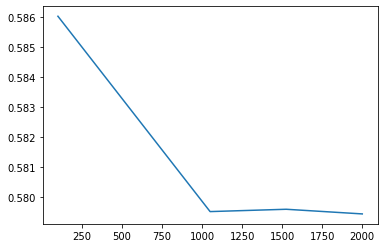

In [9]:
sns.lineplot(x=part,y=mean_acc)

In [10]:
part = []
mean_acc = []
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.4)
for i in np.linspace(100,500,num=5):
    part.append(i)
    model = ExtraTreesClassifier(n_estimators=int(i))
    acc = evaluate_model(x_train,y_train,model)
    mean_acc.append(np.mean(acc))
    print(i)

100.0
200.0
300.0
400.0
500.0


<AxesSubplot:>

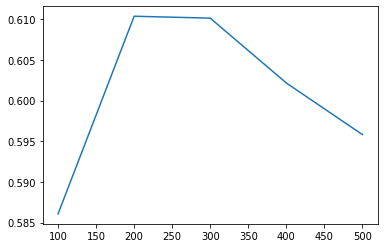

In [11]:
sns.lineplot(x=part,y=mean_acc)

In [12]:
model = ExtraTreesClassifier(n_estimators=200)

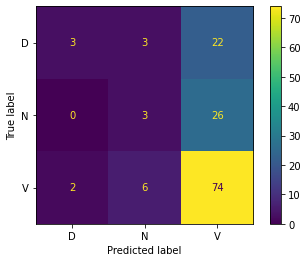

In [15]:
plot_confusion_matrix(model,x_test,y_test)

In [18]:
accuracy_score(y_test,model.predict(x_test))

0.5755395683453237

# Tunning max depth

In [94]:
part = []
mean_acc = []
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.45)
for i in np.linspace(3,20,num=10):
    part.append(int(i))
    model = ExtraTreesClassifier(n_estimators=200,max_depth=int(i))
    acc = evaluate_model(x_train,y_train,model)
    mean_acc.append(np.mean(acc))
    print(i)

3.0
4.888888888888889
6.777777777777778
8.666666666666666
10.555555555555555
12.444444444444445
14.333333333333332
16.22222222222222
18.11111111111111
20.0


<AxesSubplot:>

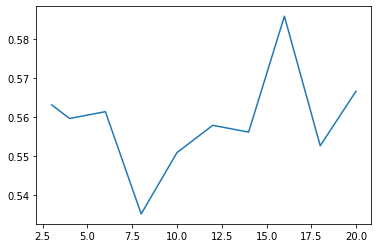

In [39]:
sns.lineplot(x=part,y=mean_acc,).set_title('Tuning Max Depth')

In [40]:
model = ExtraTreesClassifier(n_estimators=200,max_depth=10)

In [41]:
model.fit(x_train,y_train)

ExtraTreesClassifier(max_depth=10, n_estimators=200)

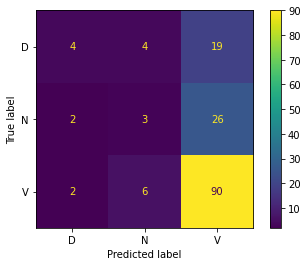

In [42]:
plot_confusion_matrix(model,x_test,y_test)

In [37]:
accuracy_score(y_test,model.predict(x_test))

0.6105769230769231

# Tunning Min Sample Leaf

In [102]:
part = []
mean_acc = []
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.45)
for i in np.linspace(1,10,num=10):
    part.append(int(i))
    model = ExtraTreesClassifier(n_estimators=200,max_depth=15,min_samples_leaf=int(i))
    acc = evaluate_model(x_train,y_train,model)
    mean_acc.append(np.mean(acc))
    print(i)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


<AxesSubplot:>

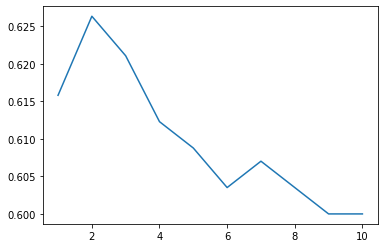

In [98]:
sns.lineplot(x=part,y=mean_acc)

<AxesSubplot:>

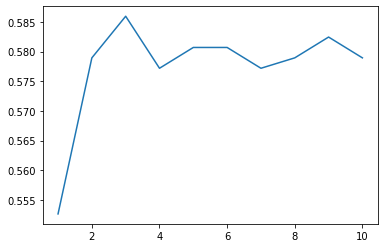

In [100]:
sns.lineplot(x=part,y=mean_acc)

<AxesSubplot:>

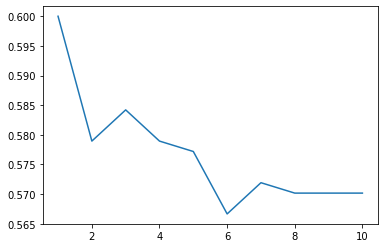

In [103]:
sns.lineplot(x=part,y=mean_acc)

<AxesSubplot:>

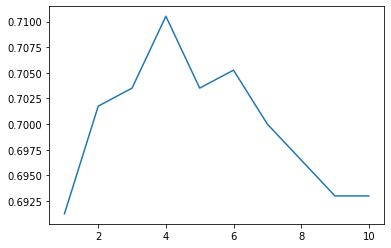

In [81]:
sns.lineplot(x=part,y=mean_acc)

In [107]:
model = ExtraTreesClassifier(n_estimators=200,max_depth=10,min_samples_leaf=1)

In [108]:
model.fit(x_train,y_train)

ExtraTreesClassifier(max_depth=10, n_estimators=200)

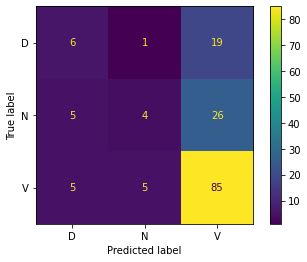

In [109]:
plot_confusion_matrix(model,x_test,y_test)

In [110]:
accuracy_score(y_test,model.predict(x_test))

0.6089743589743589

In [111]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           D       0.38      0.23      0.29        26
           N       0.40      0.11      0.18        35
           V       0.65      0.89      0.76        95

    accuracy                           0.61       156
   macro avg       0.48      0.41      0.41       156
weighted avg       0.55      0.61      0.55       156



# CHoix du % du split

In [51]:
part = []
mean_acc = []
for i in np.linspace(0.25,0.7,num=20):
    i=round(i,3)
    part.append(i)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = i)
    model = ExtraTreesClassifier()
    acc = evaluate_model(x_train,y_train,model)
    mean_acc.append(np.mean(acc))

<AxesSubplot:>

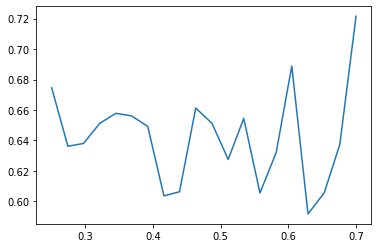

In [52]:
sns.lineplot(x=part,y=mean_acc)

# Tunning Nombre d'arbre

In [53]:
part = []
mean_acc = []
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.4)
for i in np.linspace(100,2000,num=5):
    part.append(i)
    model = ExtraTreesClassifier(n_estimators=int(i))
    acc = evaluate_model(x_train,y_train,model)
    mean_acc.append(np.mean(acc))
    print(i)

100.0
575.0
1050.0
1525.0
2000.0


<AxesSubplot:>

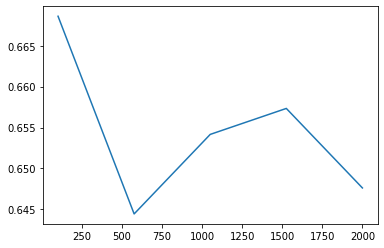

In [54]:
sns.lineplot(x=part,y=mean_acc)

In [55]:
part = []
mean_acc = []
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.4)
for i in np.linspace(100,500,num=5):
    part.append(i)
    model = ExtraTreesClassifier(n_estimators=int(i))
    acc = evaluate_model(x_train,y_train,model)
    mean_acc.append(np.mean(acc))
    print(i)

100.0
200.0
300.0
400.0
500.0


<AxesSubplot:>

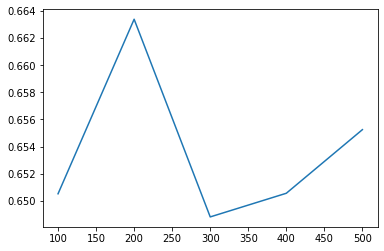

In [56]:
sns.lineplot(x=part,y=mean_acc)

In [57]:
model = ExtraTreesClassifier(n_estimators=200)

In [59]:
model.fit(x_train,y_train)

ExtraTreesClassifier(n_estimators=200)

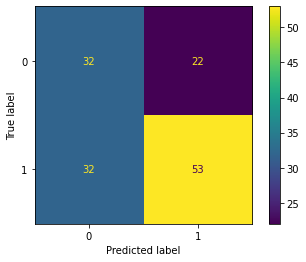

In [60]:
plot_confusion_matrix(model,x_test,y_test)

In [61]:
accuracy_score(y_test,model.predict(x_test))

0.6115107913669064

In [63]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54        54
           1       0.71      0.62      0.66        85

    accuracy                           0.61       139
   macro avg       0.60      0.61      0.60       139
weighted avg       0.63      0.61      0.62       139



# Tunning max depth

In [38]:
part = []
mean_acc = []
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.45)
for i in np.linspace(3,20,num=10):
    part.append(int(i))
    model = ExtraTreesClassifier(n_estimators=200,max_depth=int(i))
    acc = evaluate_model(x_train,y_train,model)
    mean_acc.append(np.mean(acc))
    print(i)

3.0
4.888888888888889
6.777777777777778
8.666666666666666
10.555555555555555
12.444444444444445
14.333333333333332
16.22222222222222
18.11111111111111
20.0


<AxesSubplot:>

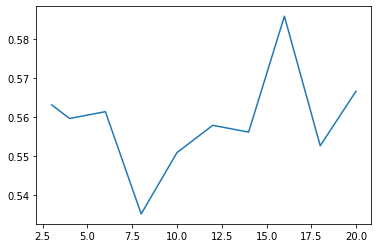

In [39]:
sns.lineplot(x=part,y=mean_acc)

In [64]:
model = ExtraTreesClassifier(n_estimators=200,max_depth=15)

In [65]:
model.fit(x_train,y_train)

ExtraTreesClassifier(max_depth=15, n_estimators=200)

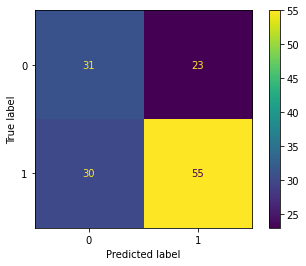

In [66]:
plot_confusion_matrix(model,x_test,y_test)

In [67]:
accuracy_score(y_test,model.predict(x_test))

0.6187050359712231

In [20]:
int(4.4)

4